---   
 <img align="left" width="50" height="50"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Classification Hands On Quiz</h1>

---
<h3><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h3>    

# 1. Load Dataset and Perform EDA

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df=pd.read_csv('disease-quiz.csv')
df.head()

Age  Gender     BP Smoker_Status       Disease
0  43.0    Male  180.0           NaN      diseased
1  18.0    Male    NaN        Smoker  not diseased
2   NaN  Female  170.0    Non-smoker      diseased
3  25.0     NaN  160.0    Non-smoker      diseased
4  45.0  Female  130.0        Smoker  not diseased

# 2. Do a Train-Test Split of your Dataset using Hold-out Set

In [3]:
X = df.drop('Disease', axis=1)
y = df['Disease']
X_Train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.2, random_state=54)
len(X_Train), len (X_hold)

(40, 10)

In [4]:
X_Train.head()

Age  Gender     BP Smoker_Status
44   56.0  Female  163.0        Smoker
31  130.0  Female  175.0        Smoker
48   32.0    Male  129.0    Non-smoker
46   43.0    Male  173.0        Smoker
14  138.0    Male  130.0        Smoker

In [5]:
y_train.head()

44        diseased
31        diseased
48    not diseased
46        diseased
14    not diseased
Name: Disease, dtype: object

# 3. Data Preprocessing and Feature Engineering

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            47 non-null     float64
 1   Gender         48 non-null     object 
 2   BP             48 non-null     float64
 3   Smoker_Status  47 non-null     object 
 4   Disease        50 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.1+ KB


In [7]:
df.describe()

Age         BP
count   47.000000   48.00000
mean    45.063830  143.06250
std     25.427992   33.41958
min     12.000000   25.00000
25%     31.500000  125.75000
50%     35.000000  153.50000
75%     51.500000  170.00000
max    138.000000  185.00000

In [8]:
df.isnull().sum()

Age              3
Gender           2
BP               2
Smoker_Status    3
Disease          0
dtype: int64

In [9]:
df.Gender.value_counts()

Male      30
Female    18
Name: Gender, dtype: int64

In [10]:
df.Smoker_Status.value_counts()

Smoker        25
Non-smoker    22
Name: Smoker_Status, dtype: int64

In [11]:
df.Disease.value_counts()

diseased        26
not diseased    24
Name: Disease, dtype: int64

### (i) Missing Value Imputation

In [60]:
num_si = SimpleImputer(missing_values=np.nan, strategy='mean')
num_si.fit(X_Train.iloc[:, 0:1])
X_Train.iloc[:, 0:1]=num_si.transform(X_Train.iloc[:, 0:1])
X_hold.iloc[:, 0:1]=num_si.transform(X_hold.iloc[:, 0:1])
num_si.fit(X_Train.iloc[:, 2:3])
X_Train.iloc[:, 2:3]=num_si.transform(X_Train.iloc[:, 2:3])
X_hold.iloc[:, 2:3]=num_si.transform(X_hold.iloc[:, 2:3])
X_Train.isna().sum()

Age              0
Gender           1
BP               0
Smoker_Status    3
dtype: int64

In [61]:
X_hold.isna().sum()

Age              0
Gender           1
BP               0
Smoker_Status    0
dtype: int64

In [62]:
cat_si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_si.fit(X_Train.iloc[:, 1:2])
X_Train.iloc[:, 1:2]=cat_si.transform(X_Train.iloc[:, 1:2])
X_hold.iloc[:, 1:2]=cat_si.transform(X_hold.iloc[:, 1:2])
cat_si.fit(X_Train.iloc[:, 3:4])
X_Train.iloc[:, 3:4]=cat_si.transform(X_Train.iloc[:, 3:4])
X_hold.iloc[:, 3:4]=cat_si.transform(X_hold.iloc[:, 3:4])
X_Train.isna().sum()

Age              0
Gender           0
BP               0
Smoker_Status    0
dtype: int64

In [63]:
X_hold.isna().sum()

Age              0
Gender           0
BP               0
Smoker_Status    0
dtype: int64

In [64]:
X_Train.head()

Age  Gender     BP Smoker_Status
44   56.0  Female  163.0        Smoker
31  130.0  Female  175.0        Smoker
48   32.0    Male  129.0    Non-smoker
46   43.0    Male  173.0        Smoker
14  138.0    Male  130.0        Smoker

### (ii) Encode Categorical Features

In [65]:
lb = LabelEncoder()
lb.fit(y_train)
y_train = lb.transform(y_train)
y_hold = lb.transform(y_hold)# Disease-> 0,   Not Diseased-> 1
y_train

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [66]:
y_hold

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [67]:
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)
ohe.fit(X_Train[['Gender', 'Smoker_Status']])
X_Train[['Gender', 'Smoker_Status']] = ohe.transform(X_Train[['Gender', 'Smoker_Status']])
X_hold[['Gender', 'Smoker_Status']] = ohe.transform(X_hold[['Gender', 'Smoker_Status']])
X_Train.head()

Age  Gender     BP  Smoker_Status
44   56.0       0  163.0              1
31  130.0       0  175.0              1
48   32.0       1  129.0              0
46   43.0       1  173.0              1
14  138.0       1  130.0              1

In [68]:
X_hold.head()

Age  Gender     BP  Smoker_Status
10  48.0       0  170.0              1
49  44.0       0  132.0              0
24  32.0       0  120.0              1
39  63.0       1  128.0              1
38  31.0       1  123.0              1

### (iii) Detect and Handle Outliers

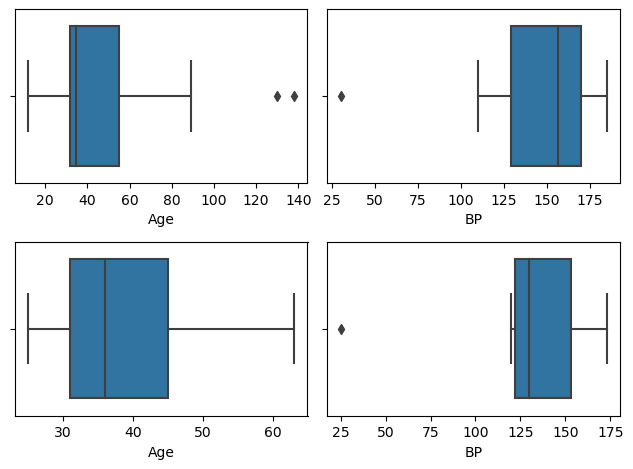

In [12]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.boxplot(x='Age', data=X_Train, ax=ax1)
sns.boxplot(x='BP', data=X_Train, ax=ax2)
sns.boxplot(x='Age', data=X_hold, ax=ax3)
sns.boxplot(x='BP', data=X_hold, ax=ax4)
plt.tight_layout()

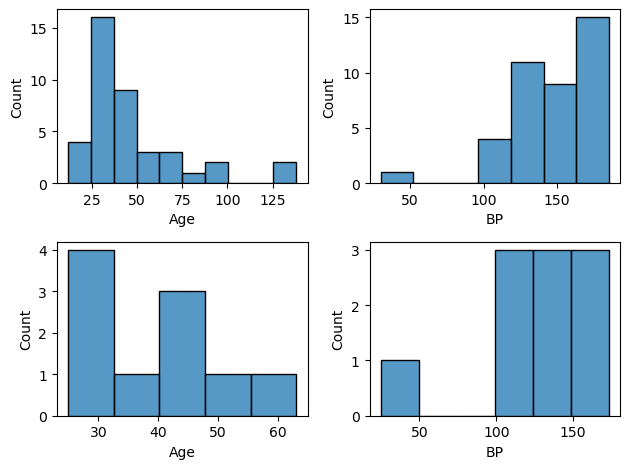

In [70]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x='Age', data=X_Train, ax=ax1)
sns.histplot(x='BP', data=X_Train, ax=ax2)
sns.histplot(x='Age', data=X_hold, ax=ax3)
sns.histplot(x='BP', data=X_hold, ax=ax4)
plt.tight_layout()

<Axes: ylabel='Count'>

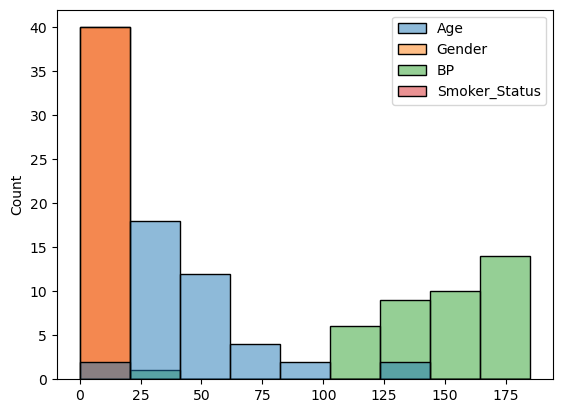

In [50]:
sns.histplot(X_Train)

In [71]:
q1 = X_Train.Age.quantile(0.25)
q3 = X_Train.Age.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
X_Train['Age'] = np.where(X_Train.Age < lower_limit, lower_limit, 
            (np.where(X_Train.Age > upper_limit , upper_limit, X_Train['Age'])))

In [72]:
q1 = X_hold.Age.quantile(0.25)
q3 = X_hold.Age.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
X_hold['Age'] = np.where(X_hold.Age < lower_limit, lower_limit, 
            (np.where(X_hold.Age > upper_limit , upper_limit, X_hold['Age'])))

In [73]:
q1 = X_Train.BP.quantile(0.25)
q3 = X_Train.BP.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
X_Train['BP'] = np.where(X_Train.BP < lower_limit, lower_limit, 
            (np.where(X_Train.BP > upper_limit , upper_limit, X_Train['BP'])))

In [74]:
q1 = X_hold.BP.quantile(0.25)
q3 = X_hold.BP.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
X_hold['BP'] = np.where(X_hold.BP < lower_limit, lower_limit, 
            (np.where(X_hold.BP > upper_limit , upper_limit, X_hold['BP'])))

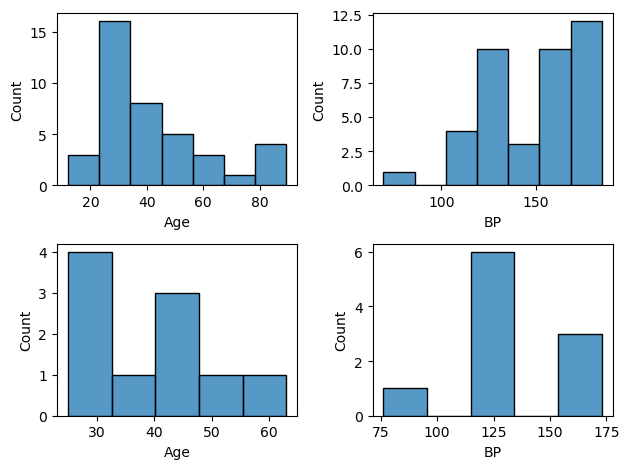

In [75]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x='Age', data=X_Train, ax=ax1)
sns.histplot(x='BP', data=X_Train, ax=ax2)
sns.histplot(x='Age', data=X_hold, ax=ax3)
sns.histplot(x='BP', data=X_hold, ax=ax4)
plt.tight_layout()

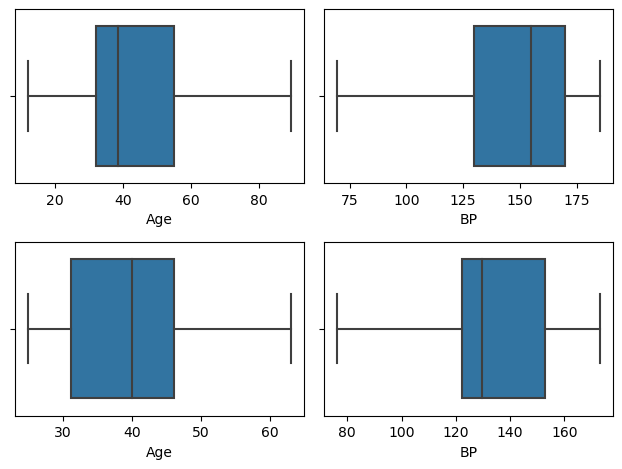

In [76]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.boxplot(x='Age', data=X_Train, ax=ax1)
sns.boxplot(x='BP', data=X_Train, ax=ax2)
sns.boxplot(x='Age', data=X_hold, ax=ax3)
sns.boxplot(x='BP', data=X_hold, ax=ax4)
plt.tight_layout()

### (iv) Feature Scaling

In [77]:
ss = StandardScaler()
ss.fit(X_Train[['Age', 'BP', 'Gender', 'Smoker_Status']])
X_Train[['Age', 'BP', 'Gender', 'Smoker_Status']] = ss.transform(X_Train[['Age', 'BP', 'Gender', 'Smoker_Status']])
X_hold[['Age', 'BP', 'Gender', 'Smoker_Status']] = ss.transform(X_hold[['Age', 'BP', 'Gender', 'Smoker_Status']])
X_Train.head()

Age    Gender        BP  Smoker_Status
44  0.580670 -1.441153  0.586326       0.859727
31  2.239728 -1.441153  1.052447       0.859727
48 -0.607908  0.693889 -0.734353      -1.163160
46 -0.063143  0.693889  0.974760       0.859727
14  2.239728  0.693889 -0.695509       0.859727

In [78]:
X_hold.head()

Age    Gender        BP  Smoker_Status
10  0.184477 -1.441153  0.858230       0.859727
49 -0.013619 -1.441153 -0.617822      -1.163160
24 -0.607908 -1.441153 -1.083944       0.859727
39  0.927339  0.693889 -0.773196       0.859727
38 -0.657433  0.693889 -0.967413       0.859727

# 4. Model Training

In [79]:
model = LogisticRegression(multi_class='multinomial', solver='sag', penalty='l2', max_iter=5000)
model.fit(X_Train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', solver='sag')

# 5. Model Evaluation

In [80]:
scores_array = cross_val_score(model, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array.mean())

Accuracy:  0.9


In [87]:
y_predict = model.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
print("F1-Score : ", f1_score(y_hold, y_predict))
print("Precision :", precision_score(y_hold, y_predict , average=None))
print("Recall :", recall_score(y_hold, y_predict, average=None))
print("Classification Report :\n", classification_report(y_hold, y_predict))

Accuracy:  1.0
F1-Score :  1.0
Precision : [1. 1.]
Recall : [1. 1.]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# 6. Hyperparameter Tuning

In [88]:
params = {"penalty":['l2'],
          "solver": ['liblinear', 'newton-cholesky'],
          "max_iter":[100, 200, 300, 400, 500]
         }
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_Train, y_train)
print("Best Score: ", gs.best_score_)
print("Bes Params: ", gs.best_params_)

Best Score:  0.9
Bes Params:  {'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


# 7. Create a Pipelined Model

In [13]:
categorical_transformer = Pipeline(steps=
                                    [
                                        ('SI1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('OHE1', OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32))
                                    ]
                                   )
numeric_transformer = Pipeline(
                                    [
                                        ('SI2', SimpleImputer(missing_values=np.nan, strategy='mean'))
                                    ]
                                   )

In [14]:
preprocessor = ColumnTransformer(transformers=
                                     [
                                         ('numeric', numeric_transformer, [0,2]),
                                         ('categorical', categorical_transformer, [1,3])
                                     ], remainder='passthrough'
                                 )

In [15]:
params = {"penalty":['l2'],
          "solver": ['liblinear'],
          "max_iter": [100]
         }
pipe_model = Pipeline(steps=
                      [
                          ('preprocessor', preprocessor),
                          ('standard', StandardScaler()),
                          ('Estimator', GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5, n_jobs=-1))
                      ]
                     )
pipe_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('SI2',
                                                                   SimpleImputer())]),
                                                  [0, 2]),
                                                 ('categorical',
                                                  Pipeline(steps=[('SI1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE1',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 sparse_output=False))]),
                                                  [1, 3])])),
                ('standard', StandardScaler()),
                ('Estimator',
                 GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                              param_grid={'max_iter': [100], 'penalty': ['l2'],
                                          'solver': ['liblinear']}))])

In [16]:
pipe_model.fit(X_Train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('SI2',
                                                                   SimpleImputer())]),
                                                  [0, 2]),
                                                 ('categorical',
                                                  Pipeline(steps=[('SI1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE1',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 sparse_output=False))]),
                                                  [1, 3])])),
                ('standard', StandardScaler()),
                ('Estimator',
                 GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                              param_grid={'max_iter': [100], 'penalty': ['l2'],
                                          'solver': ['liblinear']}))])

In [17]:
scores_array = cross_val_score(pipe_model, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array.mean())

Accuracy:  0.925


In [18]:
y_predict = pipe_model.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
print("Classification Report :\n", classification_report(y_hold, y_predict))

Accuracy:  1.0
Classification Report :
               precision    recall  f1-score   support

    diseased       1.00      1.00      1.00         3
not diseased       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [20]:
age = 34
sex = 'Male'
bp = np.nan
smoker = 'Smoker'
new_data = pd.DataFrame({'Age':age, "Gender":sex, "BP":bp, "Smoker_Status":smoker}, index=[0])
y_pred = pipe_model.predict(new_data)
print(y_pred)

['diseased']


# 8. Serialize the Model and Carry out Prediction

In [21]:
pipe_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('SI2',
                                                                   SimpleImputer())]),
                                                  [0, 2]),
                                                 ('categorical',
                                                  Pipeline(steps=[('SI1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE1',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 sparse_output=False))]),
                                                  [1, 3])])),
                ('standard', StandardScaler()),
                ('Estimator',
                 GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                              param_grid={'max_iter': [100], 'penalty': ['l2'],
                                          'solver': ['liblinear']}))])

In [23]:
joblib.dump(pipe_model, 'quiz_model1.pkl')

['quiz_model1.pkl']

# 9. Deploy your model on Local Machine using Streamlit

In [ ]:
import pandas as pd
import numpy as np
import joblib
import streamlit as st

# loading model
model = joblib.load("quiz_model1.pkl")

#UI Elements to get Imput From User
st.title("Predicting Diseas")

age = st.number_input("Age", min_value=np.nan)
sex = st.selectbox("Gender", ['Male', 'Female', np.nan])
bp = st.number_input("BP", min_value=np.nan)
smoker = st.selectbox("Smoking Status", ['Non-smoker', 'Smoker', np.nan])

#Format Input User data into a Dataframe
new_data = pd.DataFrame({'Age':age, "Gender":sex, "BP":bp, "Smoker_Status":smoker}, index=[0])

result = ""
if st.button("Predict"):
    result = model.predict(new_data)
    st.subheader("Predictd Status of the Person")
    st.subheader(result)
else:
    st.subheader("Enter the required Data or Press Predict")